In [87]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib

def to_c0_txt (input_file, output_file):
    df = pd.read_csv(input_file, delimiter=' ', header=None) #read file
    df_selected = df[[2, 6]] #choose sequence and c0 column
    df_selected.to_csv(output_file, sep=' ', header=False, index=False) #import to new txt file

def top_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_75th_percentile = df['C0'].quantile(0.75)#calculate 75th percentile
    filtered_df = df[df['C0'] > c0_75th_percentile] #store each entry where c0 > 75th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file
    
def low_25_percent (input_file, output_file):
    df = pd.read_csv(input_file, delim_whitespace=True)# read new file with only sequence and c0
    c0_25th_percentile = df['C0'].quantile(0.25)#calculate 25th percentile
    filtered_df = df[df['C0'] < c0_25th_percentile] #store each entry where c0 < 25th pecentile
    filtered_df.to_csv(output_file, sep="\t", index=False) #new file

def kmer_simi_under_5(input_file, kmer_len): #OLD Function
    if kmer_len > 5:
        print("kmer length too large")
        return None
    else:
        with open(input_file, "r") as file: #read file
            lines = file.readlines()
        kmer_dict = {}
        for kmer in map(''.join, itertools.product('ATCG', repeat=kmer_len)): #make all possilbe kmers
            count = 0
            for line in lines: #grab sequence
                columns = line.split()
                seq = columns[0]
                for i in range(len(seq) - kmer_len + 1): #count number of times sequence appears
                    sequence = seq[i:i + kmer_len]
                    if sequence == kmer:
                        count += 1
            kmer_dict[kmer] = count
    

        if kmer_len <= 5: #if too long then matplot will die
            sorted_kmer_dict = {k: v for k, v in sorted(kmer_dict.items(), key=lambda item: item[1], reverse=True)}
            k_mers = list(sorted_kmer_dict.keys())# Extract the k-mers and counts for plotting
            counts = list(sorted_kmer_dict.values())
            fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
            ax.bar(k_mers, counts)
            ax.set_xlabel("K-mer")# Add labels and title
            ax.set_ylabel("Number of Instances")
            ax.set_title("K-mer Similarity")
            plt.xticks(rotation=90)
            plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
            plt.show()# Display the graph
        top_ten_items = sorted(kmer_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        for key, value in top_ten_items:
            print(f"Kmer: {key}, #of_instances: {value}")
        print("\t")


In [89]:
to_c0_txt(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\random.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt")

top_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt")

low_25_percent(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\C0.txt", r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt")

In [113]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import os

def find_most_frequent_kmers(filename, k): #new functio
    kmers_count = defaultdict(int)
    kmers_ratio = defaultdict(float)
    # Read the DNA sequences from the file
    with open(filename, 'r') as file:
        sequences = file.read().splitlines()
    sequences.pop(0)
    file = os.path.basename(filename)[:len(os.path.basename(filename)) - 4]
    kmers_total = (50-k + 1) * (len(sequences))
    
    for line in sequences:
        column = line.split()
        sequence = column[0]
        for i in range(len(sequence) - k + 1):
            kmer = sequence[i:i + k]
            kmers_count[kmer] += 1
            kmers_ratio[kmer] += 1
    for value in list(kmers_ratio.keys()):
        kmers_ratio[value] = (kmers_ratio[value]/kmers_total) * 100    
    
    sorted_kmer_dict_percent = {k: v for k, v in sorted(kmers_ratio.items(), key=lambda item: item[1], reverse=True)[:30]}
    k_mers = list(sorted_kmer_dict_percent.keys())# Extract the k-mers and counts for plotting
    counts = list(sorted_kmer_dict_percent.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(k_mers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Percent Of Total Possible Kmers")
    ax.set_title(f"{file} percent Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    
    if k >= 6:
        sorted_kmer_dict = {k: v for k, v in sorted(kmers_count.items(), key=lambda item: item[1], reverse=True)[:500]}
    else:
        sorted_kmer_dict = {k: v for k, v in sorted(kmers_count.items(), key=lambda item: item[1], reverse=True)}
    k_mers = list(sorted_kmer_dict.keys())# Extract the k-mers and counts for plotting
    counts = list(sorted_kmer_dict.values())
    fig, ax = plt.subplots(figsize=(10, 6)) # Create a bar graph
    ax.bar(k_mers, counts)
    ax.set_xlabel("K-mer")# Add labels and title
    ax.set_ylabel("Number of Instances")
    ax.set_title(f"{file} Kmer Length ({k})")
    plt.xticks(rotation=90)
    plt.xlabel("X-axis", labelpad=35)# Adjust x-axis label separation
    plt.show()# Display the graph
    
    
    top_ten_items = sorted(kmers_count.items(), key=lambda x: x[1], reverse=True)[:10]
    for key, value in top_ten_items:
        print(f"Kmer: {key}, #of_instances: {value}, Percent of total: {kmers_ratio[key]}")


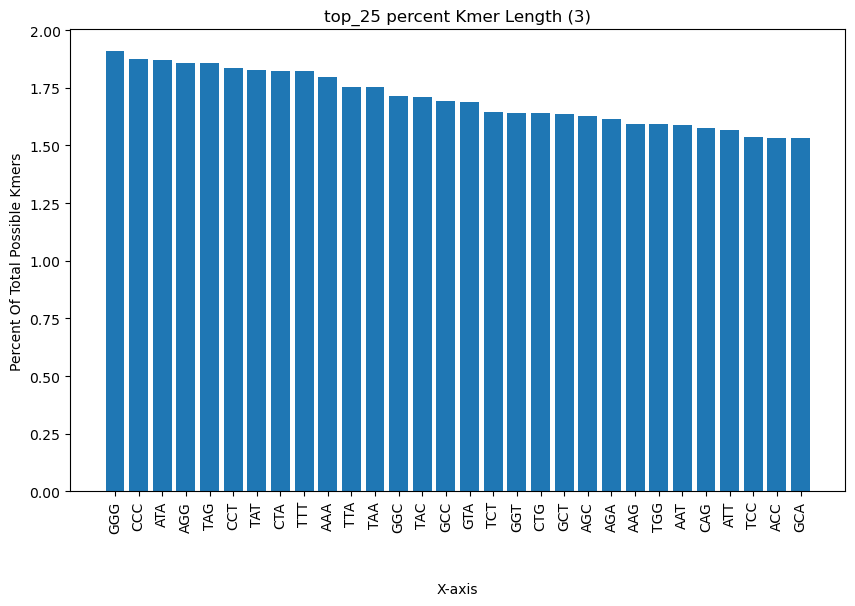

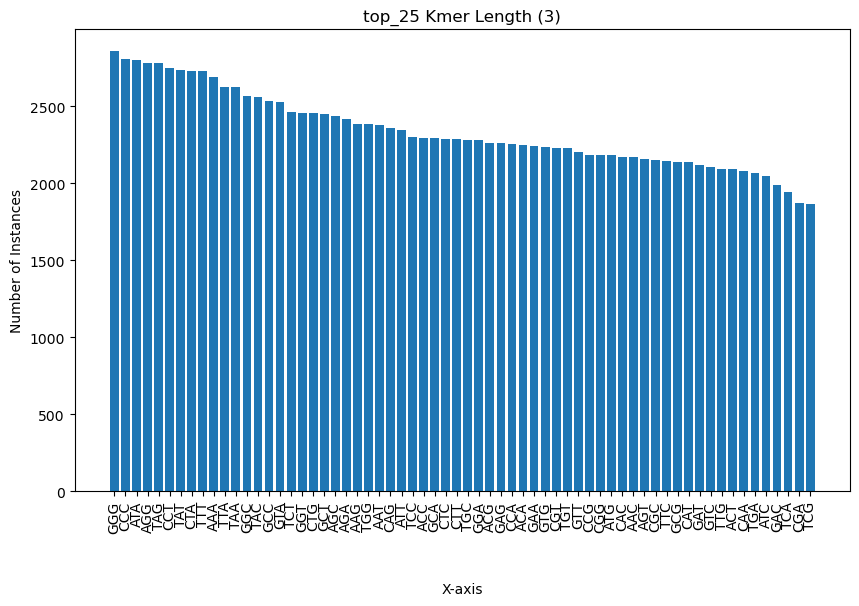

Kmer: GGG, #of_instances: 2855, Percent of total: 1.90760637160573
Kmer: CCC, #of_instances: 2806, Percent of total: 1.8748663673294845
Kmer: ATA, #of_instances: 2800, Percent of total: 1.8708573872140262
Kmer: AGG, #of_instances: 2780, Percent of total: 1.8574941201624975
Kmer: TAG, #of_instances: 2777, Percent of total: 1.855489630104768
Kmer: CCT, #of_instances: 2748, Percent of total: 1.8361128928800512
Kmer: TAT, #of_instances: 2735, Percent of total: 1.8274267692965578
Kmer: CTA, #of_instances: 2731, Percent of total: 1.824754115886252
Kmer: TTT, #of_instances: 2726, Percent of total: 1.8214132991233696
Kmer: AAA, #of_instances: 2688, Percent of total: 1.7960230917254651


In [114]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 3)

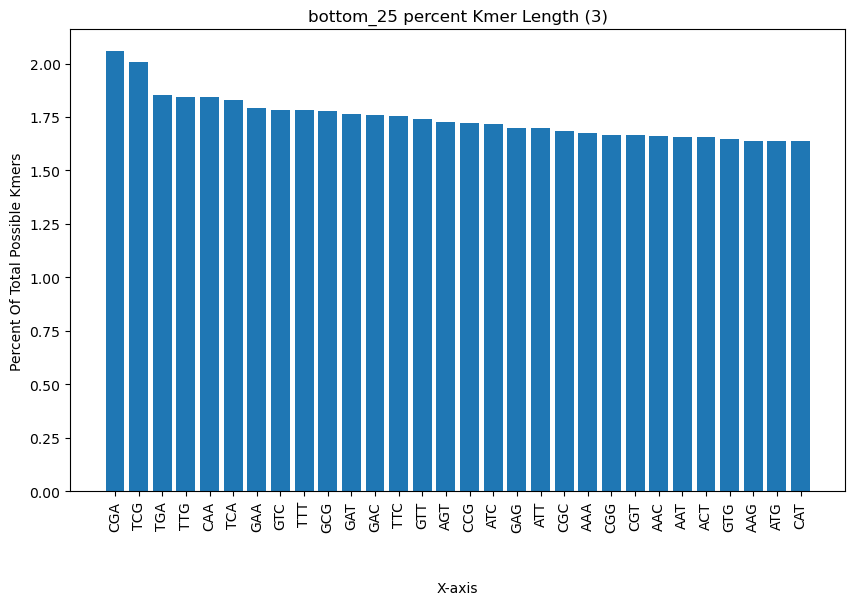

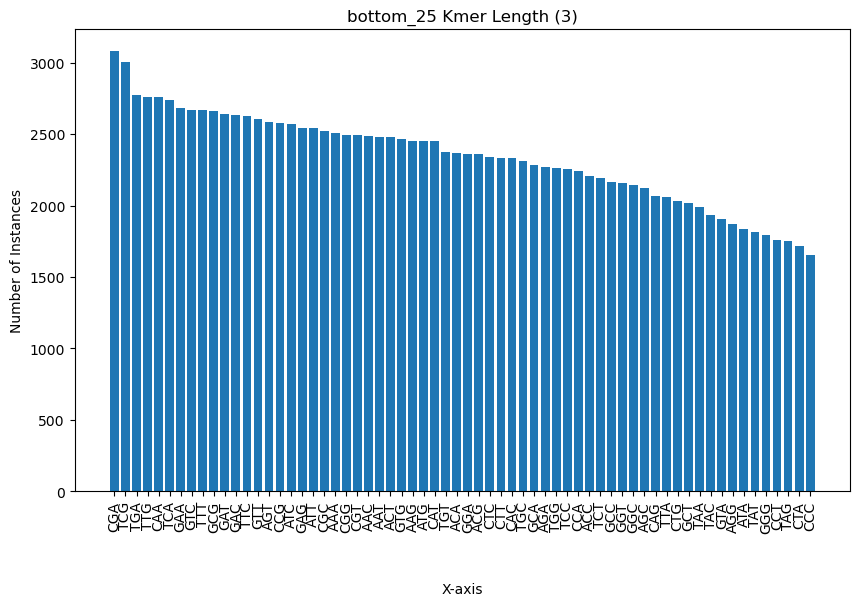

Kmer: CGA, #of_instances: 3078, Percent of total: 2.0566067992302757
Kmer: TCG, #of_instances: 3003, Percent of total: 2.0064945477870433
Kmer: TGA, #of_instances: 2775, Percent of total: 1.8541533033996151
Kmer: TTG, #of_instances: 2762, Percent of total: 1.8454671798161213
Kmer: CAA, #of_instances: 2757, Percent of total: 1.8421263630532394
Kmer: TCA, #of_instances: 2738, Percent of total: 1.8294312593542867
Kmer: GAA, #of_instances: 2680, Percent of total: 1.7906777849048534
Kmer: GTC, #of_instances: 2669, Percent of total: 1.783327988026513
Kmer: TTT, #of_instances: 2666, Percent of total: 1.7813234979687835
Kmer: GCG, #of_instances: 2661, Percent of total: 1.7779826812059012


In [115]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 3)

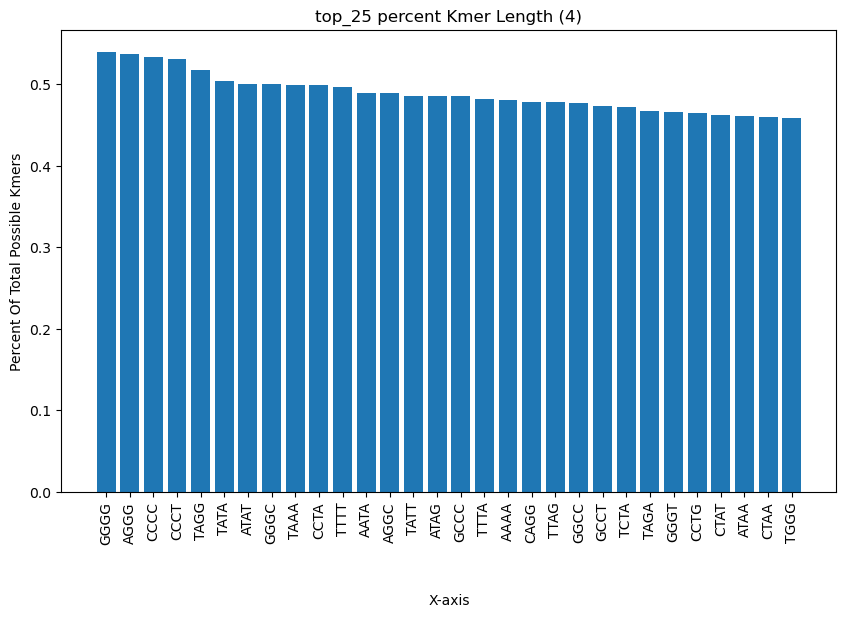

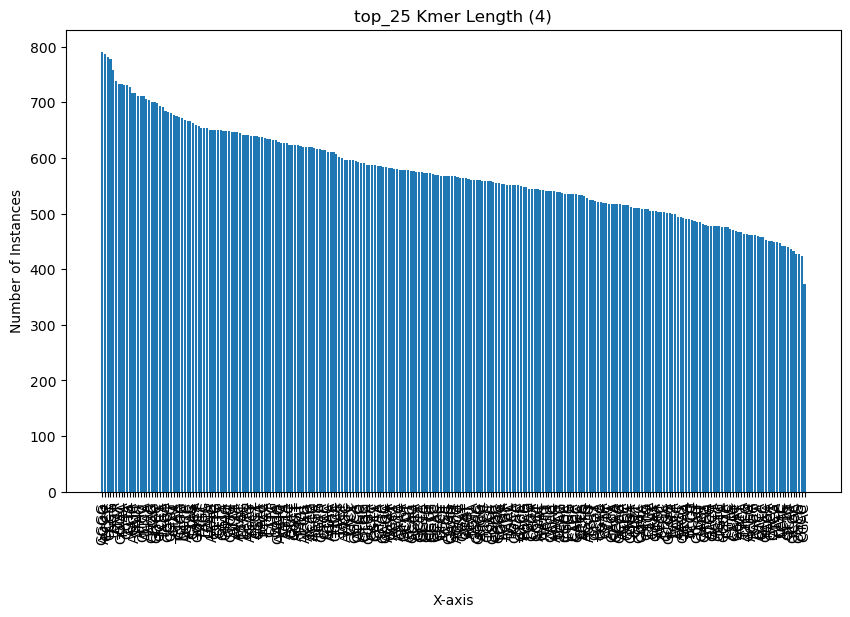

Kmer: GGGG, #of_instances: 791, Percent of total: 0.5397622589494084
Kmer: AGGG, #of_instances: 786, Percent of total: 0.5363503609788053
Kmer: CCCC, #of_instances: 781, Percent of total: 0.5329384630082021
Kmer: CCCT, #of_instances: 777, Percent of total: 0.5302089446317197
Kmer: TAGG, #of_instances: 758, Percent of total: 0.517243732343428
Kmer: TATA, #of_instances: 739, Percent of total: 0.5042785200551363
Kmer: ATAT, #of_instances: 733, Percent of total: 0.5001842424904126
Kmer: GGGC, #of_instances: 732, Percent of total: 0.49950186289629195
Kmer: TAAA, #of_instances: 731, Percent of total: 0.49881948330217135
Kmer: CCTA, #of_instances: 731, Percent of total: 0.49881948330217135


In [116]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 4)

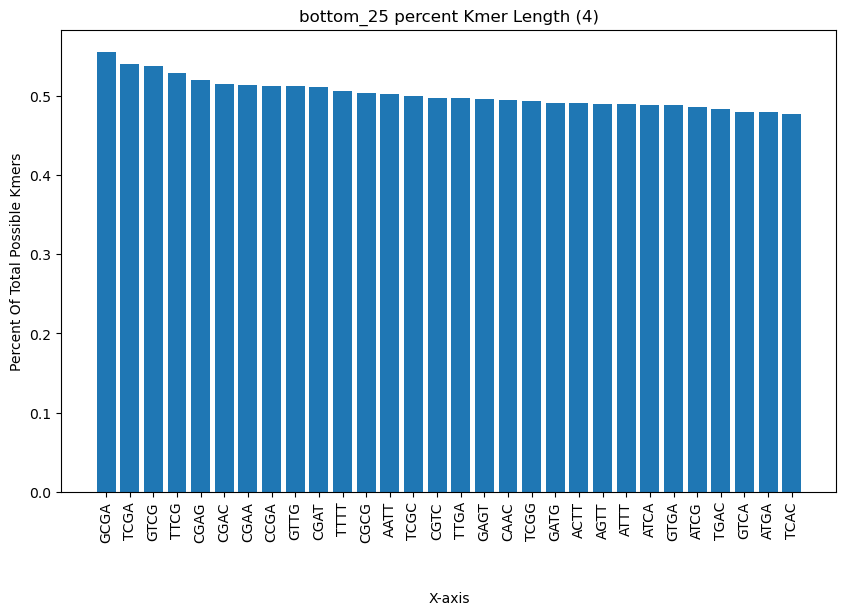

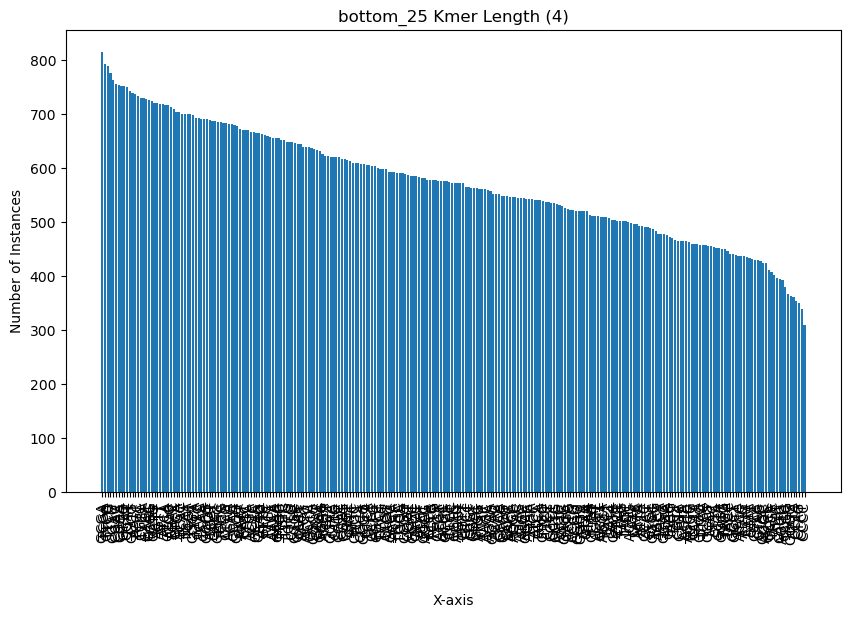

Kmer: GCGA, #of_instances: 815, Percent of total: 0.5561393692083032
Kmer: TCGA, #of_instances: 792, Percent of total: 0.540444638543529
Kmer: GTCG, #of_instances: 788, Percent of total: 0.5377151201670465
Kmer: TTCG, #of_instances: 776, Percent of total: 0.5295265650375991
Kmer: CGAG, #of_instances: 762, Percent of total: 0.5199732507199105
Kmer: CGAC, #of_instances: 755, Percent of total: 0.5151965935610662
Kmer: CGAA, #of_instances: 754, Percent of total: 0.5145142139669455
Kmer: CCGA, #of_instances: 752, Percent of total: 0.5131494547787042
Kmer: GTTG, #of_instances: 752, Percent of total: 0.5131494547787042
Kmer: CGAT, #of_instances: 749, Percent of total: 0.5111023159963425


In [119]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 4)

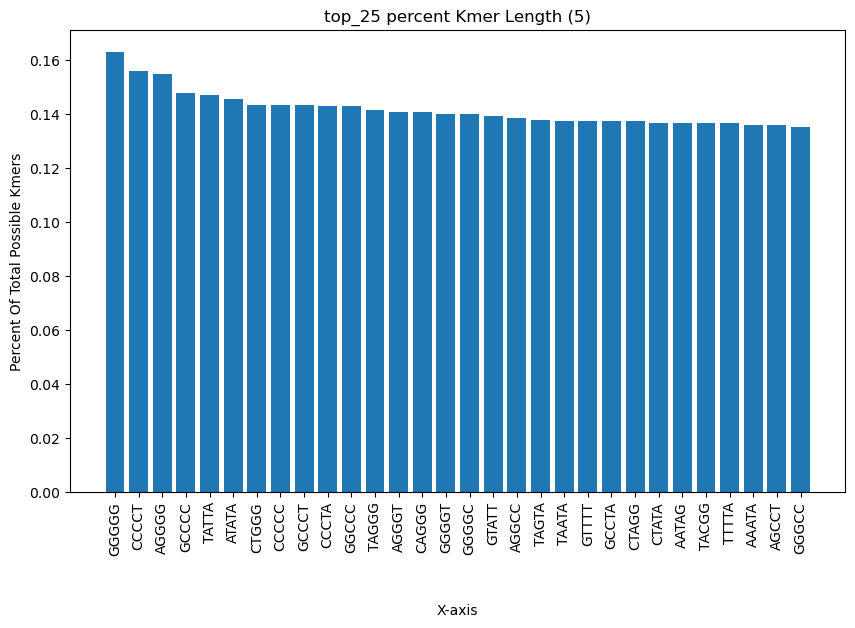

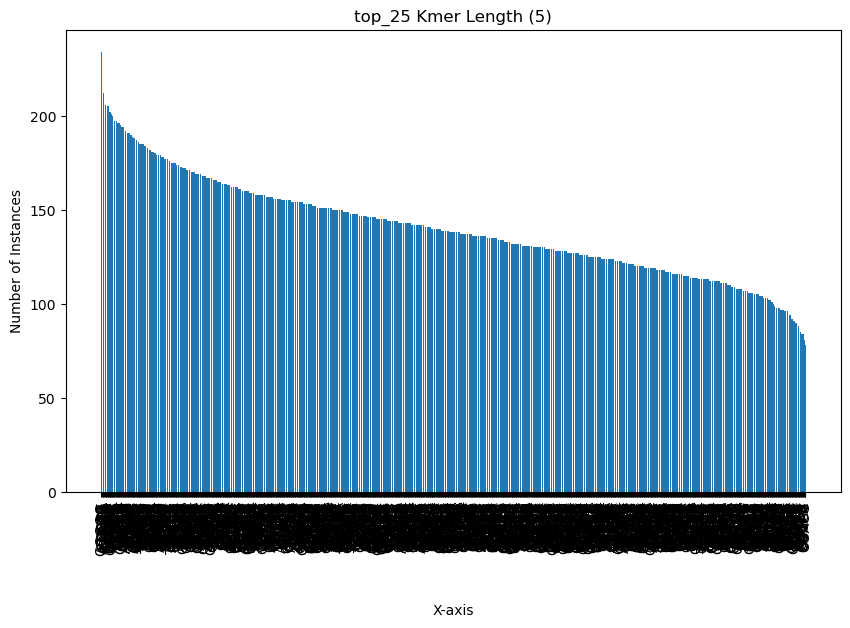

Kmer: GGGGG, #of_instances: 234, Percent of total: 0.16314806035083804
Kmer: CCCCT, #of_instances: 224, Percent of total: 0.15617592101960565
Kmer: AGGGG, #of_instances: 222, Percent of total: 0.15478149315335918
Kmer: GCCCC, #of_instances: 212, Percent of total: 0.1478093538221268
Kmer: TATTA, #of_instances: 211, Percent of total: 0.14711213988900354
Kmer: ATATA, #of_instances: 209, Percent of total: 0.14571771202275705
Kmer: CTGGG, #of_instances: 206, Percent of total: 0.14362607022338736
Kmer: CCCCC, #of_instances: 206, Percent of total: 0.14362607022338736
Kmer: GCCCT, #of_instances: 206, Percent of total: 0.14362607022338736
Kmer: CCCTA, #of_instances: 205, Percent of total: 0.1429288562902641


In [120]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 5)

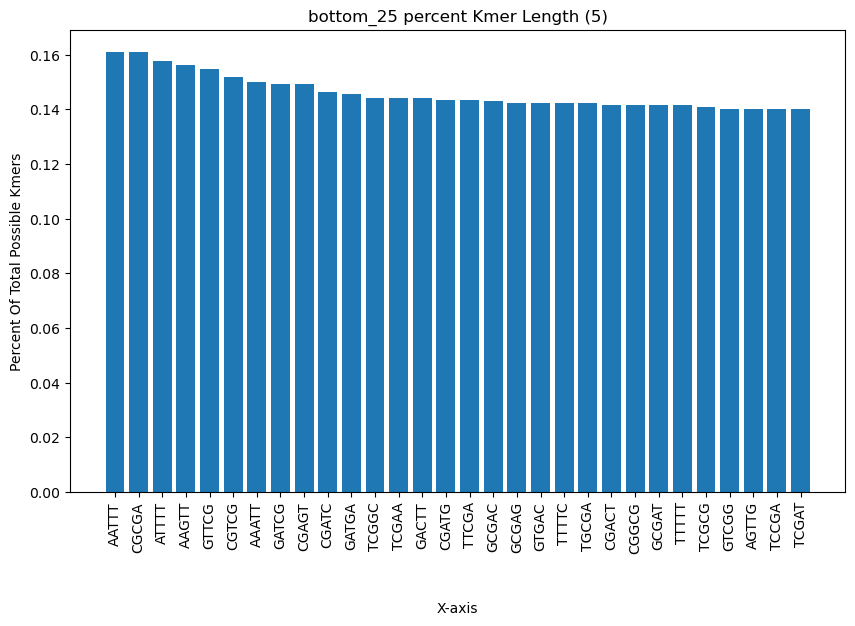

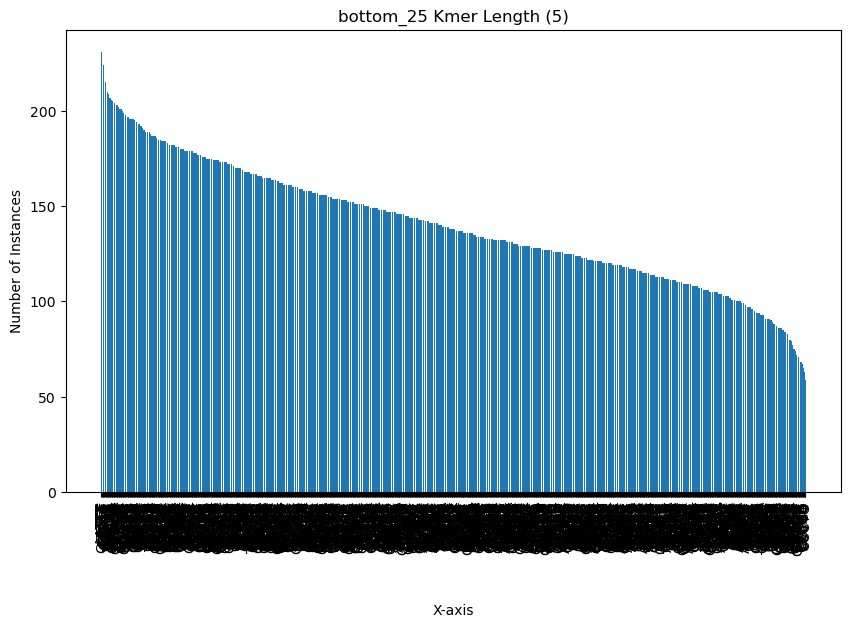

Kmer: AATTT, #of_instances: 231, Percent of total: 0.16105641855146832
Kmer: CGCGA, #of_instances: 231, Percent of total: 0.16105641855146832
Kmer: ATTTT, #of_instances: 226, Percent of total: 0.15757034888585214
Kmer: AAGTT, #of_instances: 224, Percent of total: 0.15617592101960565
Kmer: GTTCG, #of_instances: 222, Percent of total: 0.15478149315335918
Kmer: CGTCG, #of_instances: 218, Percent of total: 0.15199263742086622
Kmer: AAATT, #of_instances: 215, Percent of total: 0.1499009956214965
Kmer: GATCG, #of_instances: 214, Percent of total: 0.14920378168837325
Kmer: CGAGT, #of_instances: 214, Percent of total: 0.14920378168837325
Kmer: CGATC, #of_instances: 210, Percent of total: 0.1464149259558803


In [121]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 5)

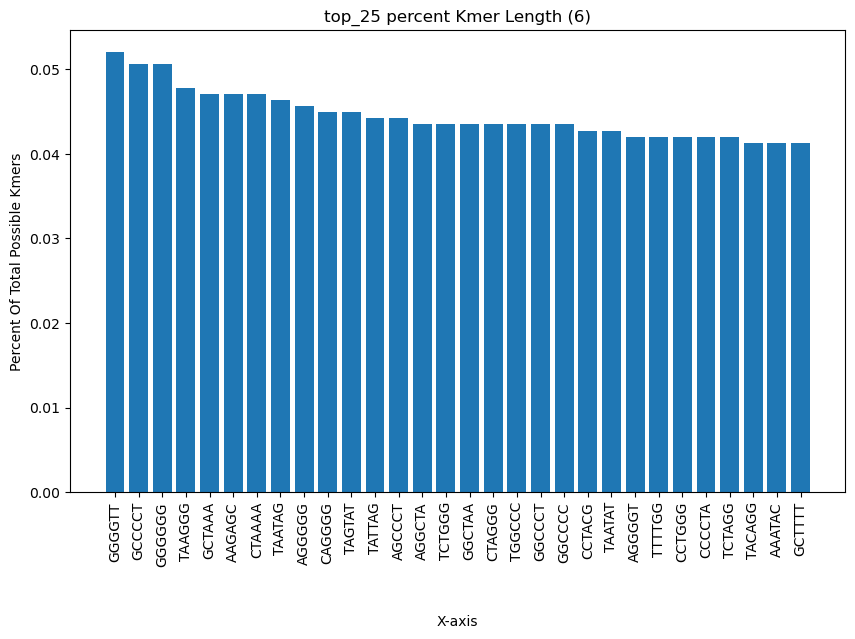

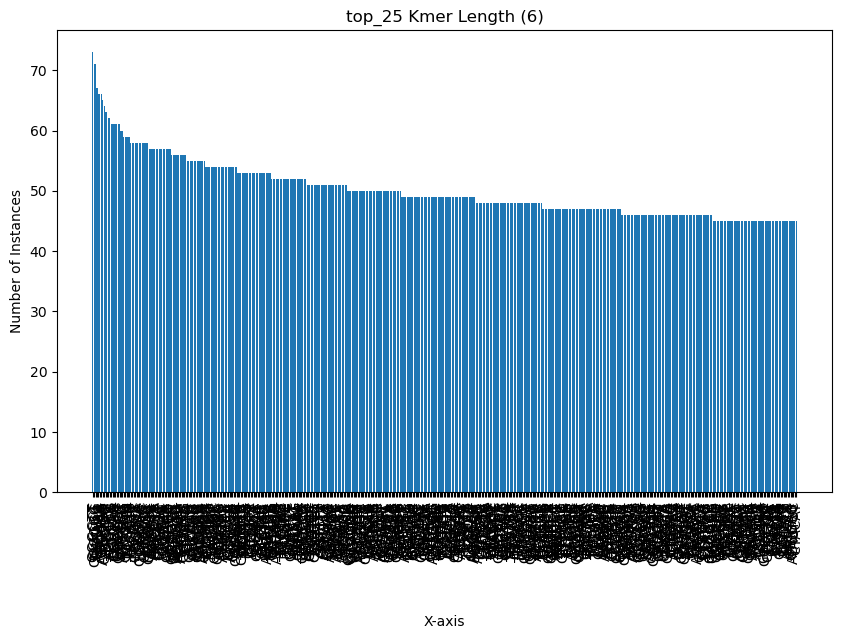

Kmer: GGGGTT, #of_instances: 73, Percent of total: 0.05202765305395196
Kmer: GCCCCT, #of_instances: 71, Percent of total: 0.050602237901788895
Kmer: GGGGGG, #of_instances: 71, Percent of total: 0.050602237901788895
Kmer: TAAGGG, #of_instances: 67, Percent of total: 0.047751407597462756
Kmer: GCTAAA, #of_instances: 66, Percent of total: 0.047038700021381226
Kmer: AAGAGC, #of_instances: 66, Percent of total: 0.047038700021381226
Kmer: CTAAAA, #of_instances: 66, Percent of total: 0.047038700021381226
Kmer: TAATAG, #of_instances: 65, Percent of total: 0.046325992445299696
Kmer: AGGGGG, #of_instances: 64, Percent of total: 0.04561328486921816
Kmer: CAGGGG, #of_instances: 63, Percent of total: 0.04490057729313662


In [122]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 6)

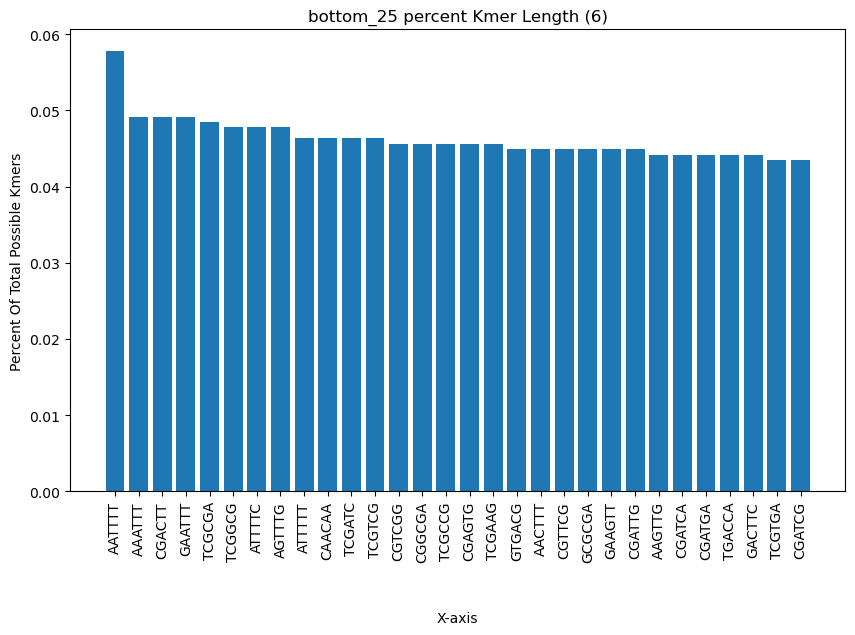

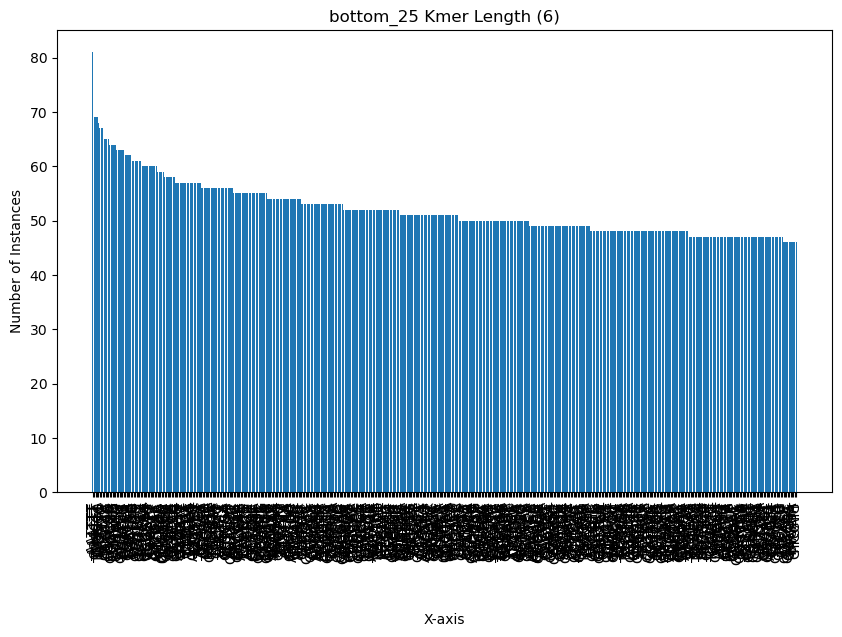

Kmer: AATTTT, #of_instances: 81, Percent of total: 0.057729313662604226
Kmer: AAATTT, #of_instances: 69, Percent of total: 0.049176822749625836
Kmer: CGACTT, #of_instances: 69, Percent of total: 0.049176822749625836
Kmer: GAATTT, #of_instances: 69, Percent of total: 0.049176822749625836
Kmer: TCGCGA, #of_instances: 68, Percent of total: 0.0484641151735443
Kmer: TCGGCG, #of_instances: 67, Percent of total: 0.047751407597462756
Kmer: ATTTTC, #of_instances: 67, Percent of total: 0.047751407597462756
Kmer: AGTTTG, #of_instances: 67, Percent of total: 0.047751407597462756
Kmer: ATTTTT, #of_instances: 65, Percent of total: 0.046325992445299696
Kmer: CAACAA, #of_instances: 65, Percent of total: 0.046325992445299696


In [123]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 6)

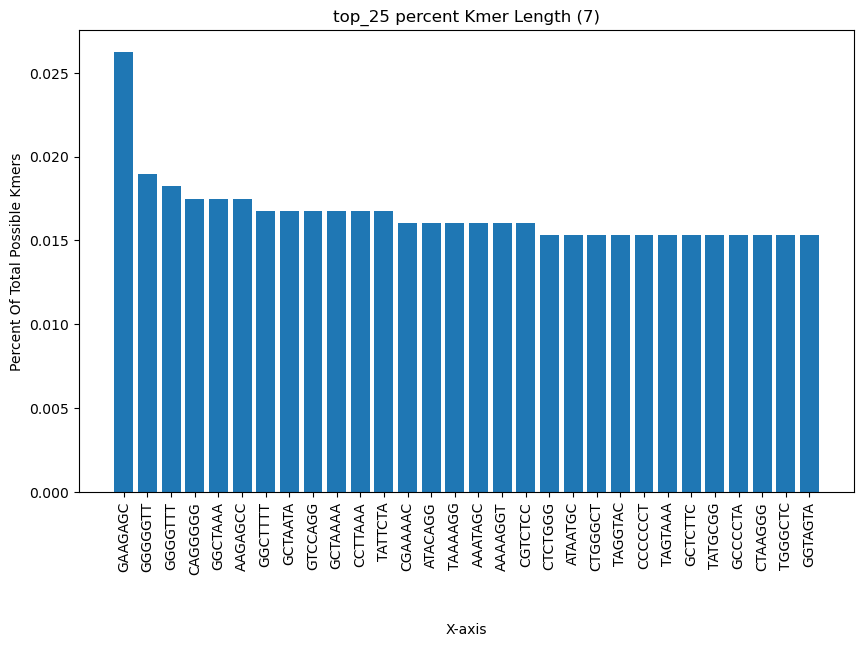

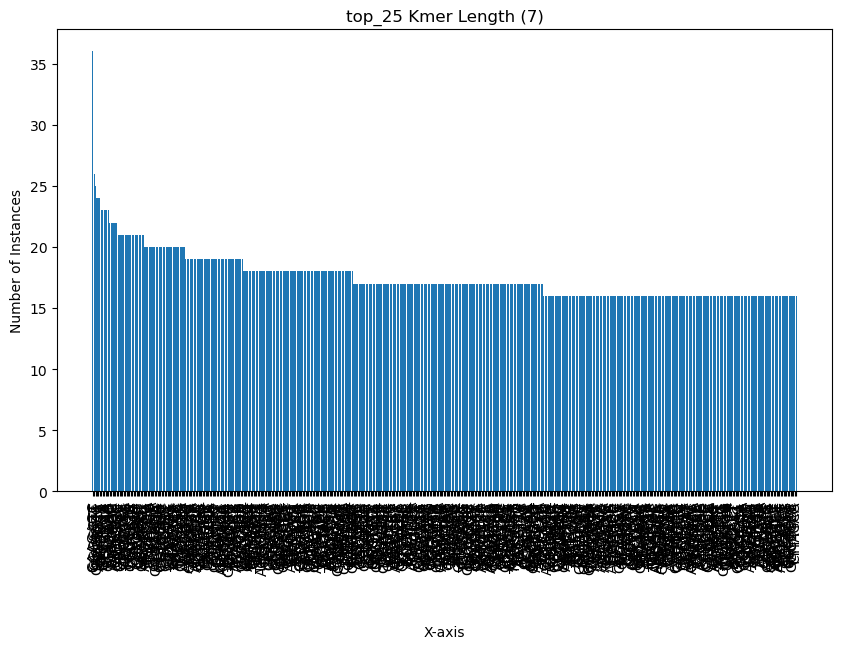

Kmer: GAAGAGC, #of_instances: 36, Percent of total: 0.02624059711936556
Kmer: GGGGGTT, #of_instances: 26, Percent of total: 0.01895154236398624
Kmer: GGGGTTT, #of_instances: 25, Percent of total: 0.018222636888448305
Kmer: CAGGGGG, #of_instances: 24, Percent of total: 0.017493731412910375
Kmer: GGCTAAA, #of_instances: 24, Percent of total: 0.017493731412910375
Kmer: AAGAGCC, #of_instances: 24, Percent of total: 0.017493731412910375
Kmer: GGCTTTT, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: GCTAATA, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: GTCCAGG, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: GCTAAAA, #of_instances: 23, Percent of total: 0.01676482593737244


In [124]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 7)

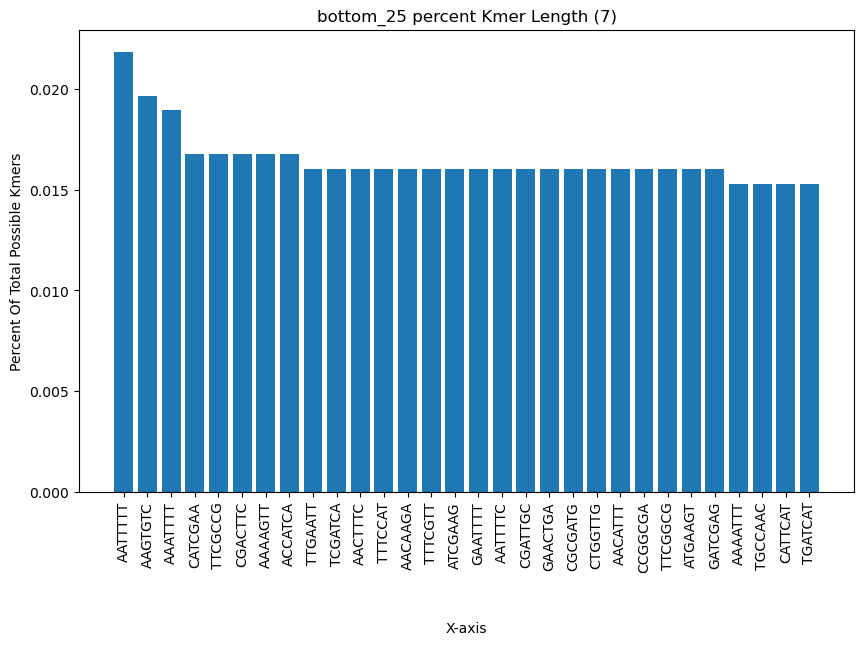

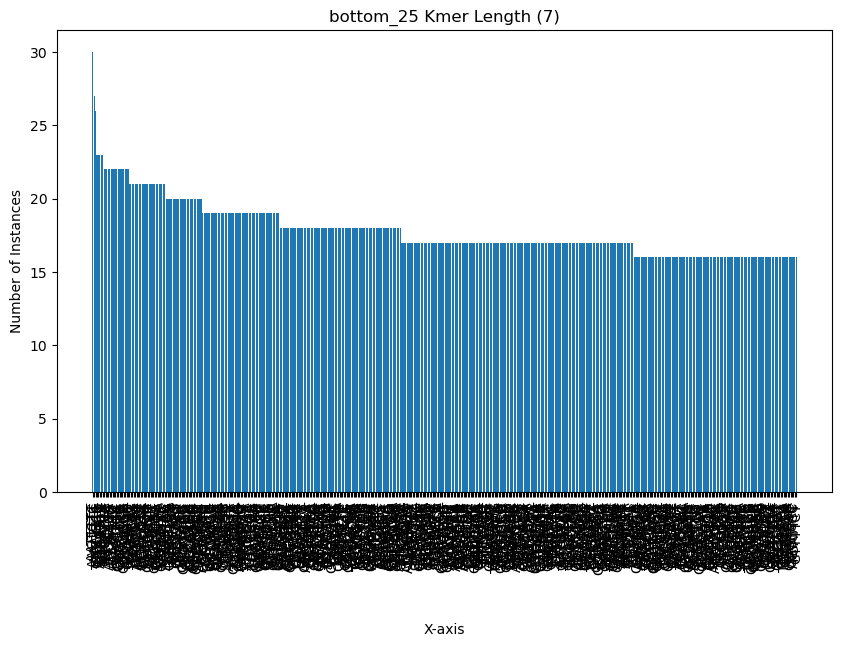

Kmer: AATTTTT, #of_instances: 30, Percent of total: 0.021867164266137967
Kmer: AAGTGTC, #of_instances: 27, Percent of total: 0.019680447839524173
Kmer: AAATTTT, #of_instances: 26, Percent of total: 0.01895154236398624
Kmer: CATCGAA, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: TTCGCCG, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: CGACTTC, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: AAAAGTT, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: ACCATCA, #of_instances: 23, Percent of total: 0.01676482593737244
Kmer: TTGAATT, #of_instances: 22, Percent of total: 0.016035920461834507
Kmer: TCGATCA, #of_instances: 22, Percent of total: 0.016035920461834507


In [125]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 7)

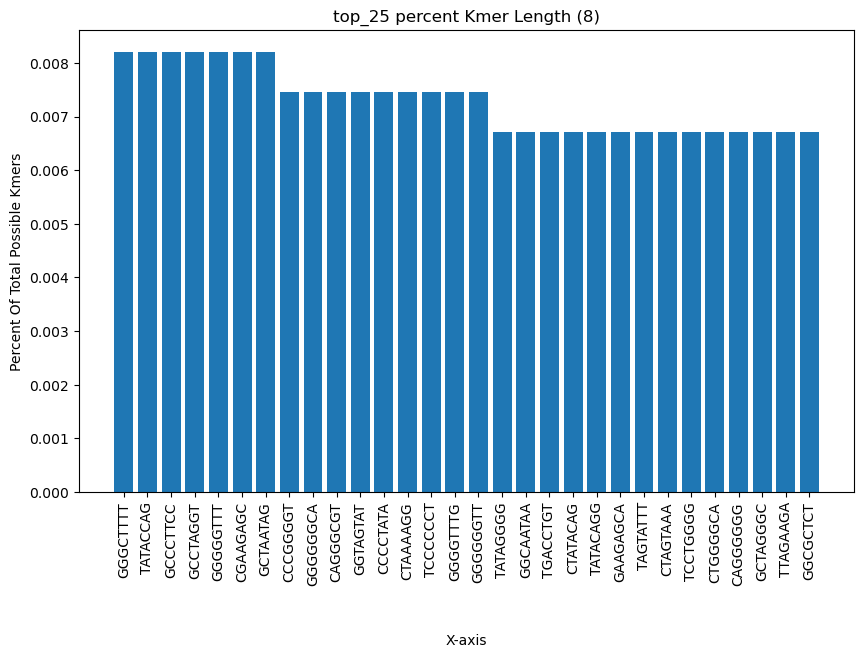

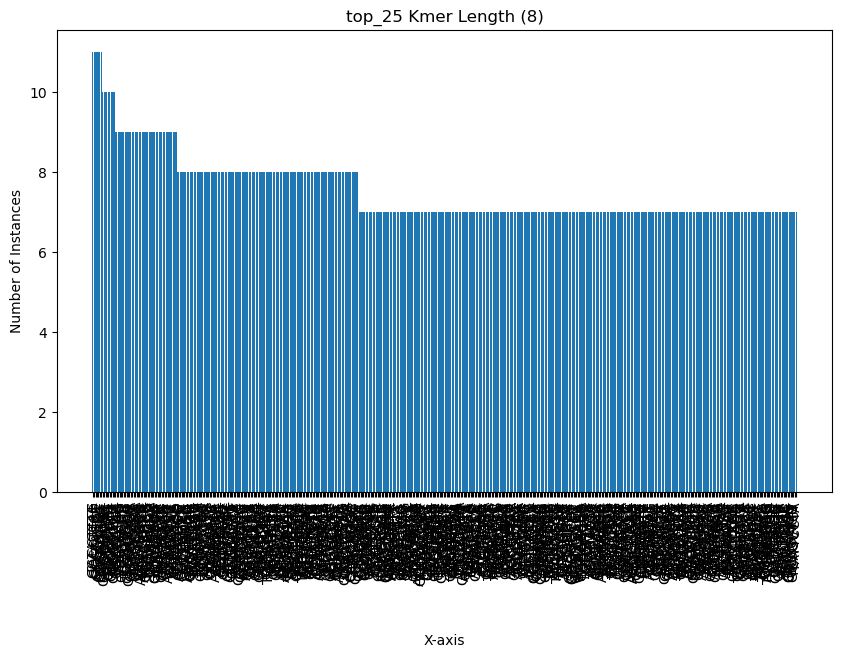

Kmer: GGGCTTTT, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: TATACCAG, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: GCCCTTCC, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: GCCTAGGT, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: GGGGGTTT, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: CGAAGAGC, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: GCTAATAG, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: CCCGGGGT, #of_instances: 10, Percent of total: 0.007458567656667213
Kmer: GGGGGGCA, #of_instances: 10, Percent of total: 0.007458567656667213
Kmer: CAGGGCGT, #of_instances: 10, Percent of total: 0.007458567656667213


In [126]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 8)

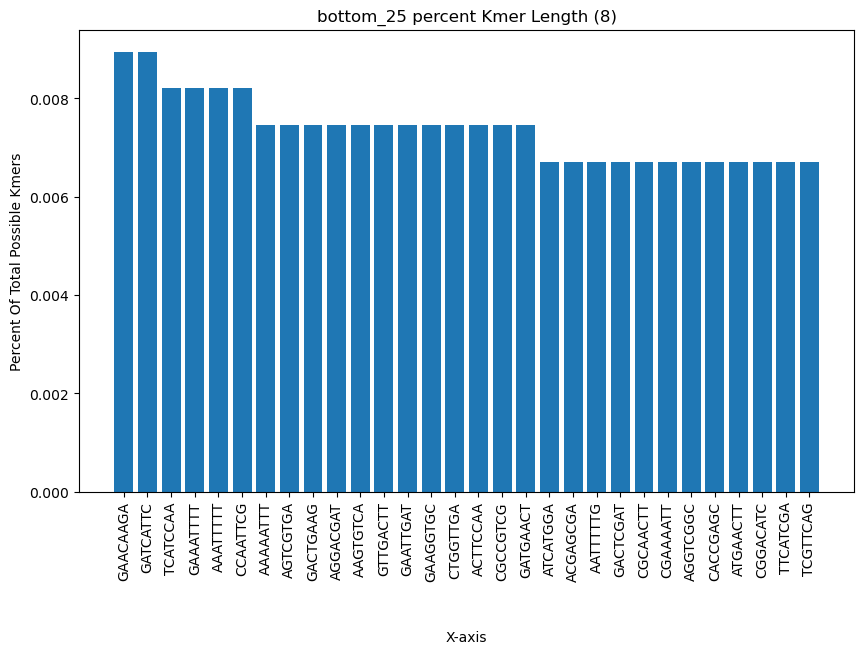

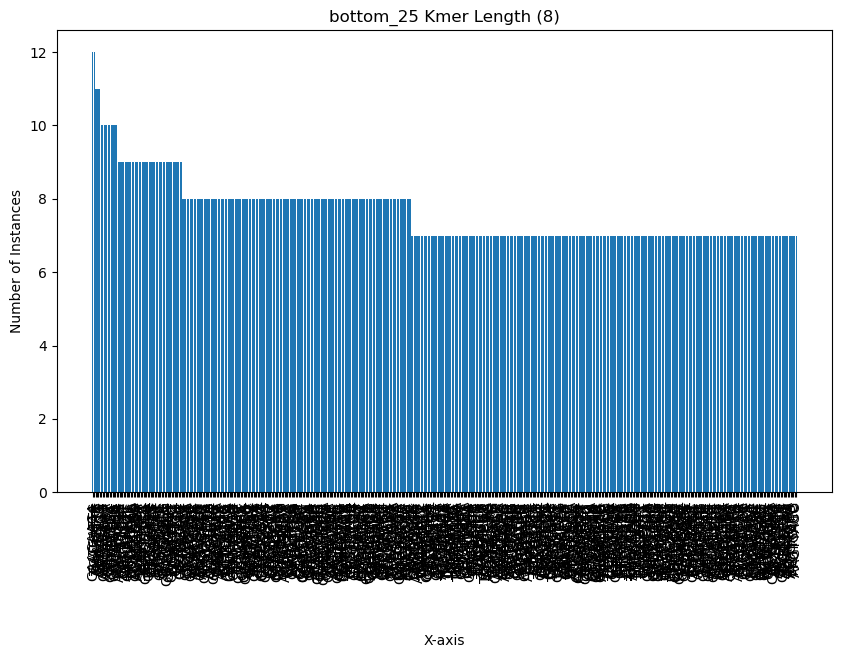

Kmer: GAACAAGA, #of_instances: 12, Percent of total: 0.008950281188000658
Kmer: GATCATTC, #of_instances: 12, Percent of total: 0.008950281188000658
Kmer: TCATCCAA, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: GAAATTTT, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: AAATTTTT, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: CCAATTCG, #of_instances: 11, Percent of total: 0.008204424422333935
Kmer: AAAAATTT, #of_instances: 10, Percent of total: 0.007458567656667213
Kmer: AGTCGTGA, #of_instances: 10, Percent of total: 0.007458567656667213
Kmer: GACTGAAG, #of_instances: 10, Percent of total: 0.007458567656667213
Kmer: AGGACGAT, #of_instances: 10, Percent of total: 0.007458567656667213


In [127]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 8)

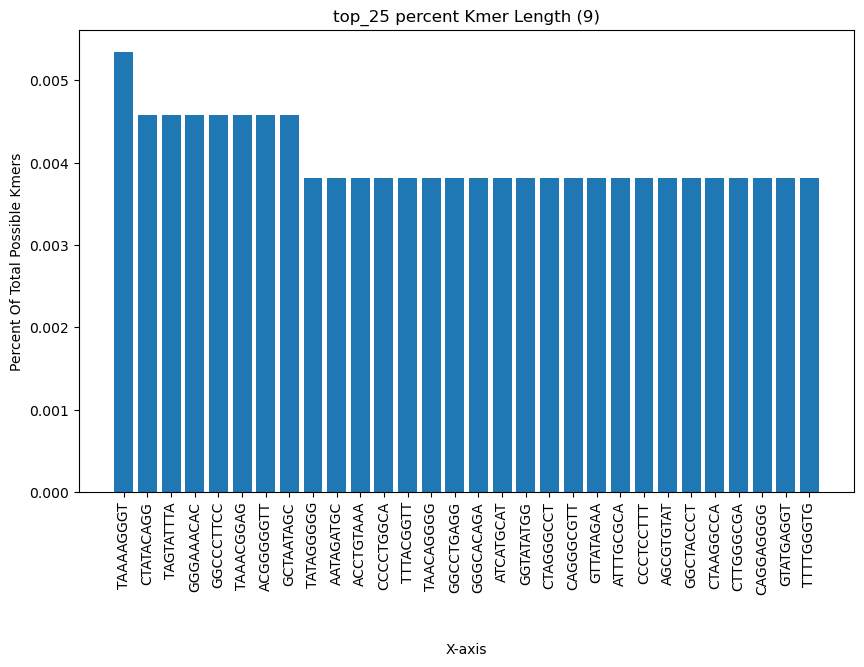

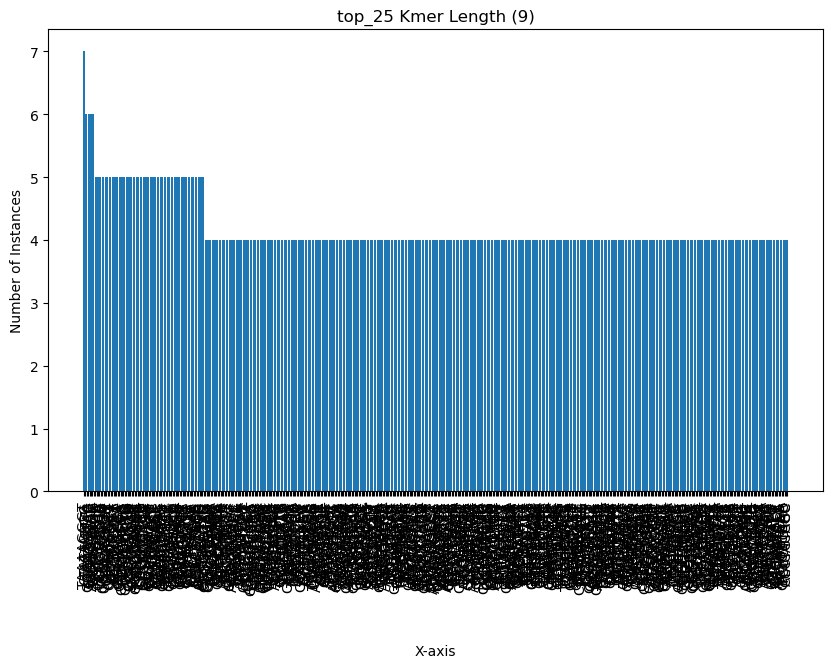

Kmer: TAAAAGGGT, #of_instances: 7, Percent of total: 0.0053453068206115026
Kmer: CTATACAGG, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: TAGTATTTA, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: GGGAAACAC, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: GGCCCTTCC, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: TAAACGGAG, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: ACGGGGGTT, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: GCTAATAGC, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: TATAGGGGG, #of_instances: 5, Percent of total: 0.0038180763004367884
Kmer: AATAGATGC, #of_instances: 5, Percent of total: 0.0038180763004367884


In [128]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt",9)

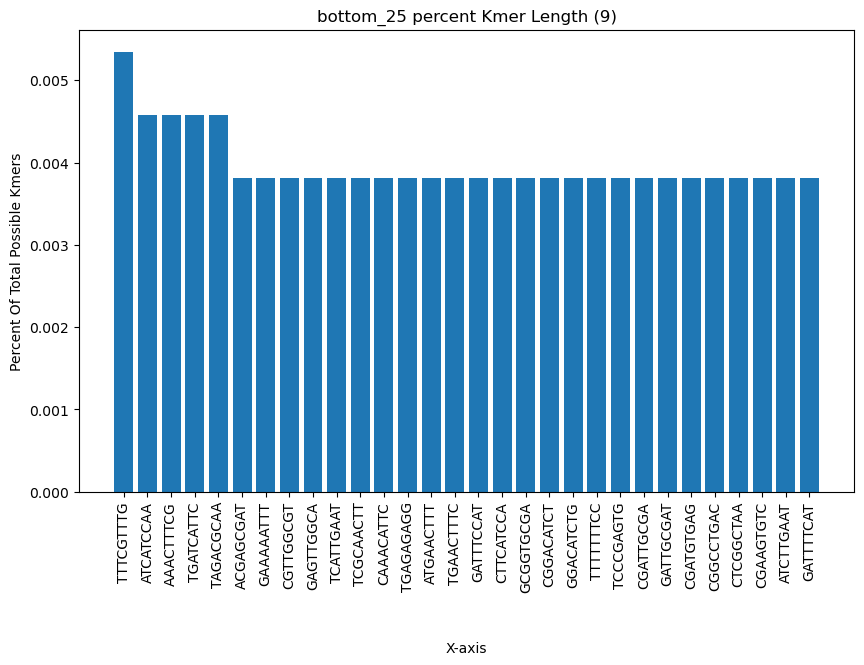

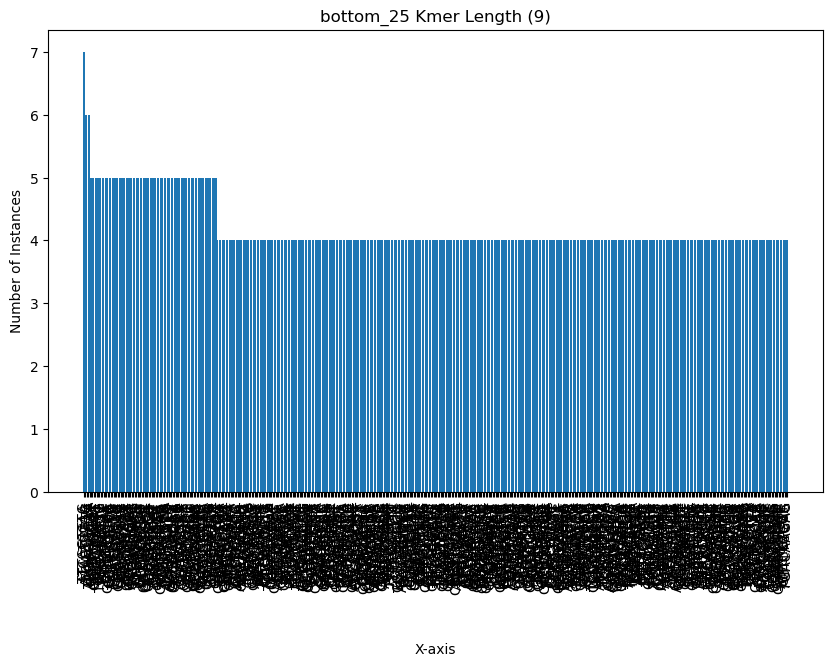

Kmer: TTTCGTTTG, #of_instances: 7, Percent of total: 0.0053453068206115026
Kmer: ATCATCCAA, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: AAACTTTCG, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: TGATCATTC, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: TAGACGCAA, #of_instances: 6, Percent of total: 0.004581691560524146
Kmer: ACGAGCGAT, #of_instances: 5, Percent of total: 0.0038180763004367884
Kmer: GAAAAATTT, #of_instances: 5, Percent of total: 0.0038180763004367884
Kmer: CGTTGGCGT, #of_instances: 5, Percent of total: 0.0038180763004367884
Kmer: GAGTTGGCA, #of_instances: 5, Percent of total: 0.0038180763004367884
Kmer: TCATTGAAT, #of_instances: 5, Percent of total: 0.0038180763004367884


In [130]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 9)

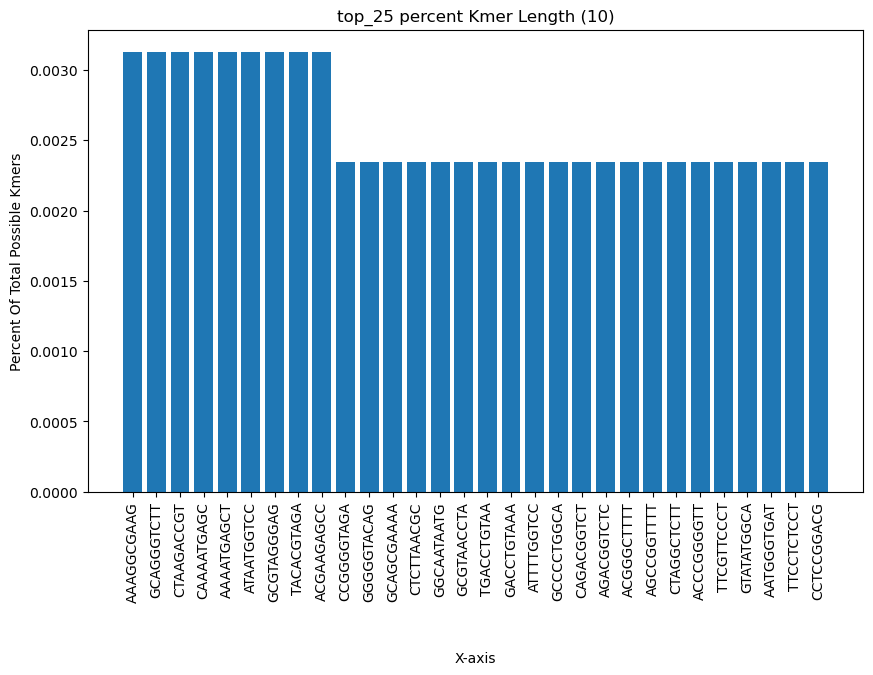

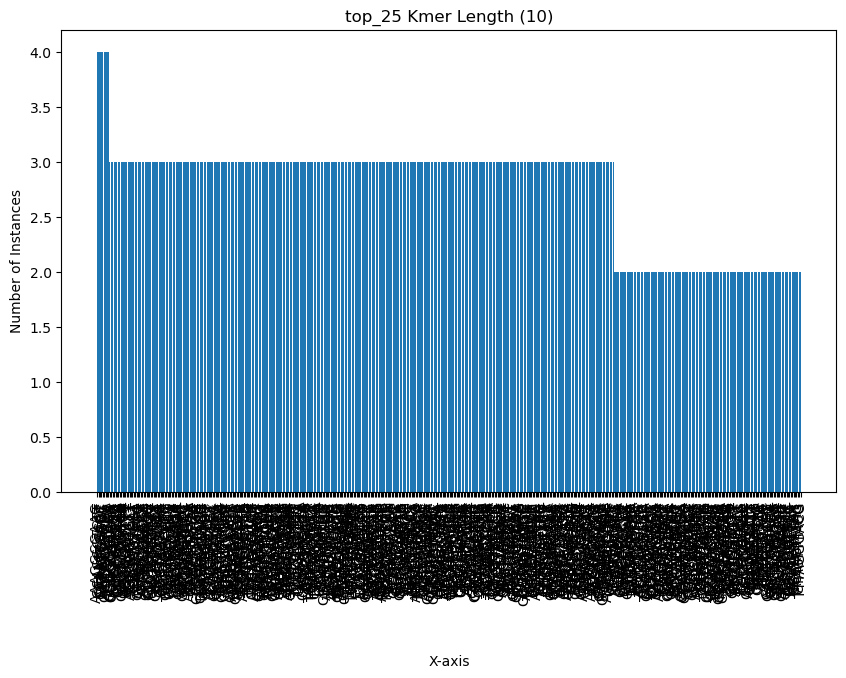

Kmer: AAAGGCGAAG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: GCAGGGTCTT, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: CTAAGACCGT, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: CAAAATGAGC, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: AAAATGAGCT, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: ATAATGGTCC, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: GCGTAGGGAG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: TACACGTAGA, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: ACGAAGAGCC, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: CCGGGGTAGA, #of_instances: 3, Percent of total: 0.002346720067585538


In [131]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\top_25.txt", 10)

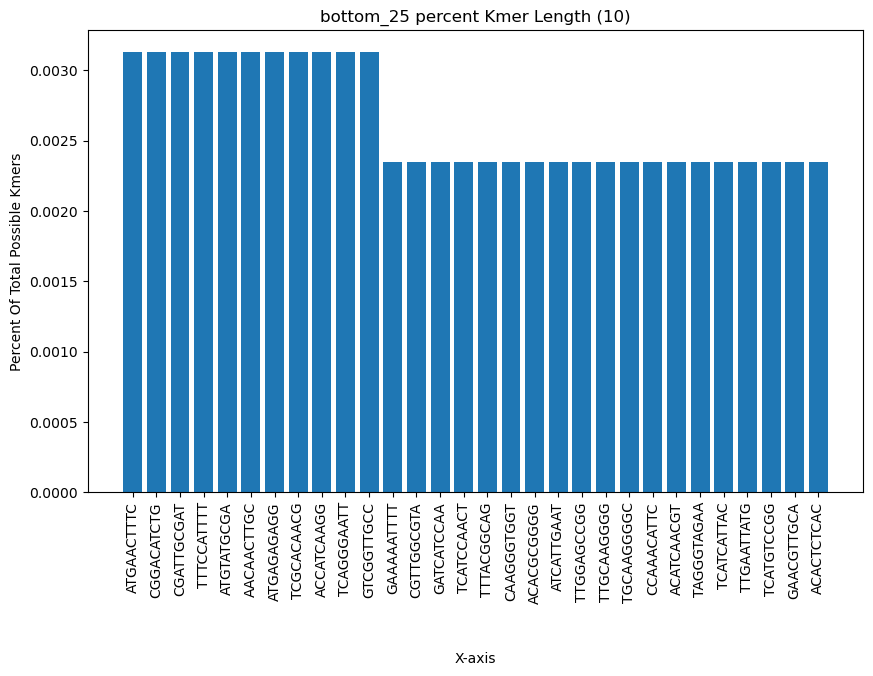

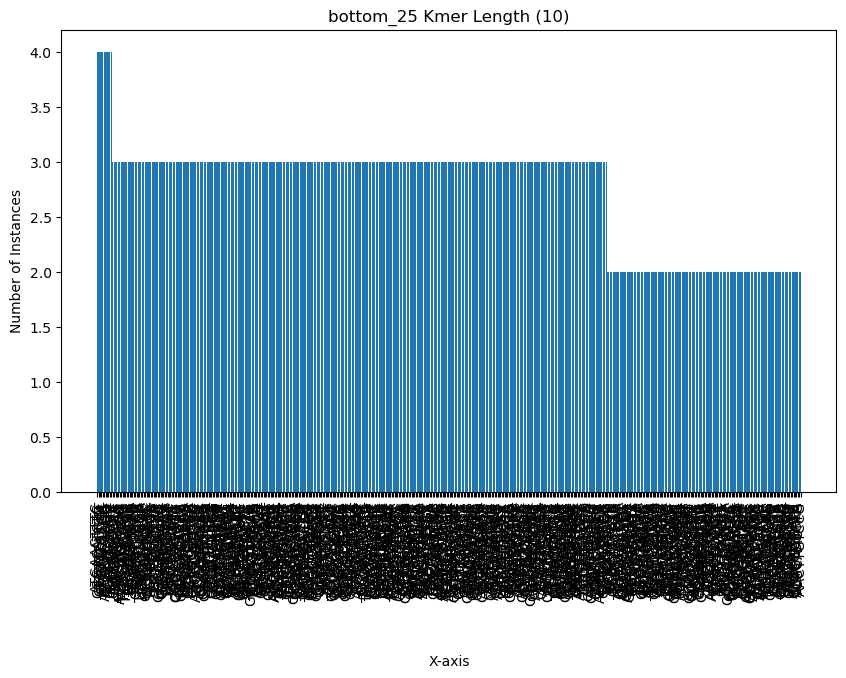

Kmer: ATGAACTTTC, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: CGGACATCTG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: CGATTGCGAT, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: TTTCCATTTT, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: ATGTATGCGA, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: AACAACTTGC, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: ATGAGAGAGG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: TCGCACAACG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: ACCATCAAGG, #of_instances: 4, Percent of total: 0.0031289600901140504
Kmer: TCAGGGAATT, #of_instances: 4, Percent of total: 0.0031289600901140504


In [133]:
find_most_frequent_kmers(r"C:\Users\chris\Downloads\DNAcycP-main\zzzz\bottom_25.txt", 10)